Import Libraries

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import tensorflow as tf
import numpy

/Users/Tim/anaconda/lib/python2.7/site-packages/cffi/model.py:526: UserWarning: 'point_conversion_form_t' has no values explicitly defined; next version will refuse to guess which integer type it is meant to be (unsigned/signed, int/long)
  % self._get_c_name())


In this cart pole environment, there are four possible observations in a given state. These combined represent the angle of the pole and the position of the cart. Using this information the system must decide as to generate an impulse to move the cart left or right.

In [2]:
#Helperfunction to take a step (or action) in the environement
def take_step(env,weights):
    observation = env.reset()
    cum_reward = 0
    for x in xrange(200):
        #env.render() #Shows the environemnt, reduces training time
        if np.matmul(weights, observation) < 0:
            action = 0 
        else:
            action = 1
        observation, reward, done, info = env.step(action)
        cum_reward += reward
        if done:
            break           
    return cum_reward
    

#Helperfunction: Trains the system by iterativley trying random weights and returns the best result
def train_system_randomly():
    env = gym.make('CartPole-v0')
    top_reward = 0 #Store highest reward
    best_weights = None #Store the weights that got the best reward
    steps_taken = 0 #How many iterations the system has taken
    
    for x in xrange(500):
        steps_taken += 1 
        weights = np.random.rand(4) * 2 - 1  #Initialise random weights
        reward = take_step(env,weights)
        if reward > top_reward:
            top_reward = reward
            best_weights = weights
            if reward == 200: #If the reward satisfies the completion criterion end exectuion
                return steps_taken #Optional
                break


#Helperfunction: Train the system using hill climbing
def train_system_hillclimb():
    env = gym.make('CartPole-v0')
    #Add noise to mutate the current weights
    added_noise = 0.2
    #Initialise weights randomly
    best_weights = np.random.rand(4) * 2 - 1  #Initialise random weights
    top_reward = 0 #Store highest reward
    steps_taken = 0 #How many iterations the system has taken
    
    for x in xrange(500):
        steps_taken += 1
        updated_weights = best_weights + (np.random.rand(4) * 2 - 1)*added_noise #Move weights a small distance in a random direction 
        reward = take_step(env,best_weights)
        if reward > top_reward:
            top_reward = reward
            best_weights = updated_weights
            if reward == 200:
                break
            
    return steps_taken #Optional
    


In [3]:
step_list = []
for x in xrange(200):
    step = train_system_randomly()
    step_list.append(step)

[2017-05-25 22:01:28,557] Making new env: CartPole-v0
[2017-05-25 22:01:28,601] Making new env: CartPole-v0
[2017-05-25 22:01:28,617] Making new env: CartPole-v0
[2017-05-25 22:01:28,645] Making new env: CartPole-v0
[2017-05-25 22:01:28,660] Making new env: CartPole-v0
[2017-05-25 22:01:28,682] Making new env: CartPole-v0
[2017-05-25 22:01:28,704] Making new env: CartPole-v0
[2017-05-25 22:01:28,718] Making new env: CartPole-v0
[2017-05-25 22:01:28,735] Making new env: CartPole-v0
[2017-05-25 22:01:28,747] Making new env: CartPole-v0
[2017-05-25 22:01:28,768] Making new env: CartPole-v0
[2017-05-25 22:01:28,785] Making new env: CartPole-v0
[2017-05-25 22:01:28,819] Making new env: CartPole-v0
[2017-05-25 22:01:28,840] Making new env: CartPole-v0
[2017-05-25 22:01:28,857] Making new env: CartPole-v0
[2017-05-25 22:01:28,886] Making new env: CartPole-v0
[2017-05-25 22:01:28,899] Making new env: CartPole-v0
[2017-05-25 22:01:28,913] Making new env: CartPole-v0
[2017-05-25 22:01:28,938] Ma

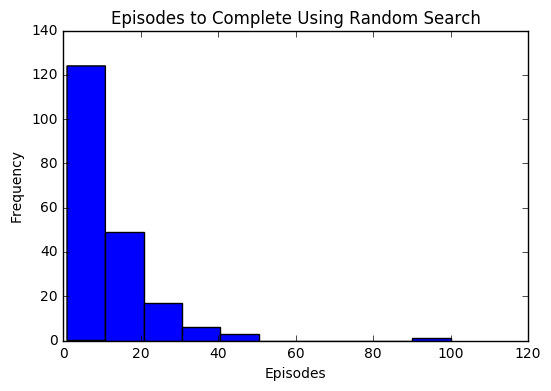

In [4]:
plt.hist(np.array(step_list))
plt.title("Episodes to Complete Using Random Search")
plt.xlabel("Episodes")
plt.ylabel("Frequency")
plt.show()

In [67]:
step_list = []
for x in xrange(200):
    step = train_system_hillclimb()
    step_list.append(step)

[2017-05-25 03:04:35,000] Making new env: CartPole-v0
[2017-05-25 03:04:35,252] Making new env: CartPole-v0
[2017-05-25 03:04:35,445] Making new env: CartPole-v0
[2017-05-25 03:04:35,577] Making new env: CartPole-v0
[2017-05-25 03:04:35,587] Making new env: CartPole-v0
[2017-05-25 03:04:35,675] Making new env: CartPole-v0
[2017-05-25 03:04:36,082] Making new env: CartPole-v0
[2017-05-25 03:04:36,169] Making new env: CartPole-v0
[2017-05-25 03:04:36,188] Making new env: CartPole-v0
[2017-05-25 03:04:36,277] Making new env: CartPole-v0
[2017-05-25 03:04:36,533] Making new env: CartPole-v0
[2017-05-25 03:04:36,617] Making new env: CartPole-v0
[2017-05-25 03:04:36,633] Making new env: CartPole-v0
[2017-05-25 03:04:36,716] Making new env: CartPole-v0
[2017-05-25 03:04:36,797] Making new env: CartPole-v0
[2017-05-25 03:04:36,884] Making new env: CartPole-v0
[2017-05-25 03:04:37,184] Making new env: CartPole-v0
[2017-05-25 03:04:37,266] Making new env: CartPole-v0
[2017-05-25 03:04:37,283] Ma

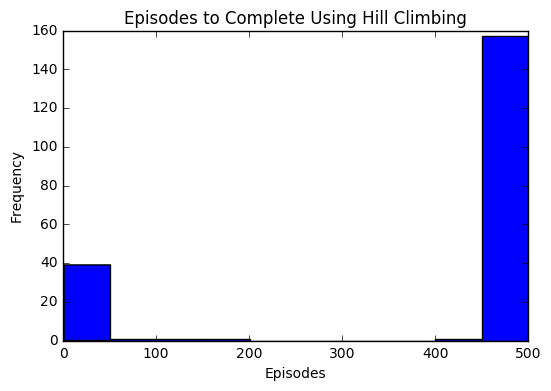

In [69]:
plt.hist(np.array(step_list))
plt.title("Episodes to Complete Using Hill Climbing")
plt.xlabel("Episodes")
plt.ylabel("Frequency")
plt.show()



In [78]:
for x in step_list:
    if x > 480:
        step_list.remove(x)
        
print step_list

[155, 1, 5, 7, 6, 1, 4, 1, 11, 5, 19, 21, 422, 16, 4, 12, 9, 1, 12, 13, 2, 9, 115, 9, 12, 1, 9, 80, 9, 1, 1, 2, 16, 8, 44, 1, 9, 14, 2, 9, 2, 5, 8]


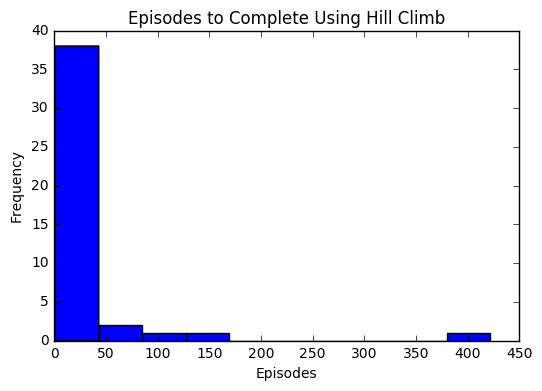

In [82]:
plt.hist(np.array(step_list))
plt.title("Episodes to Complete Using Hill Climb")
plt.xlabel("Episodes")
plt.ylabel("Frequency")
plt.show()

Train neural net using genetic algorithim

Train system using policy based methods

In [6]:
import gym
env = gym.make('CartPole-v0')
import numpy as np
import cPickle as pickle
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import math

[2017-05-25 22:54:41,833] Making new env: CartPole-v0


In [14]:
step_list = []
for x in xrange(200):
    # hyperparameters
    H = 10 # number of hidden layer neurons
    batch_size = 5 # every how many episodes to do a param update?
    #learning_rate = 1e-2 # feel free to play with this to train faster or more stably.
    learning_rate = 0.2 # feel free to play with this to train faster or more stably.
    gamma = 0.99 # discount factor for reward

    D = 4 # input dimensionality

    tf.reset_default_graph()

    #This defines the network as it goes from taking an observation of the environment to 
    #giving a probability of chosing to the action of moving left or right.
    observations = tf.placeholder(tf.float32, [None,D] , name="input_x")
    W1 = tf.get_variable("W1", shape=[D, H],
               initializer=tf.contrib.layers.xavier_initializer())
    layer1 = tf.nn.relu(tf.matmul(observations,W1))
    W2 = tf.get_variable("W2", shape=[H, 1],
               initializer=tf.contrib.layers.xavier_initializer())
    score = tf.matmul(layer1,W2)
    probability = tf.nn.sigmoid(score)

    #From here we define the parts of the network needed for learning a good policy.
    tvars = tf.trainable_variables()
    input_y = tf.placeholder(tf.float32,[None,1], name="input_y")
    advantages = tf.placeholder(tf.float32,name="reward_signal")

    # The loss function. This sends the weights in the direction of making actions 
    # that gave good advantage (reward over time) more likely, and actions that didn't less likely.
    loglik = tf.log(input_y*(input_y - probability) + (1 - input_y)*(input_y + probability))
    loss = -tf.reduce_mean(loglik * advantages) 
    newGrads = tf.gradients(loss,tvars)

    # Once we have collected a series of gradients from multiple episodes, we apply them.
    # We don't just apply gradeients after every episode in order to account for noise in the reward signal.
    adam = tf.train.AdamOptimizer(learning_rate=learning_rate) # Our optimizer
    W1Grad = tf.placeholder(tf.float32,name="batch_grad1") # Placeholders to send the final gradients through when we update.
    W2Grad = tf.placeholder(tf.float32,name="batch_grad2")
    batchGrad = [W1Grad,W2Grad]
    updateGrads = adam.apply_gradients(zip(batchGrad,tvars))

    def discount_rewards(r):
        """ take 1D float array of rewards and compute discounted reward """
        discounted_r = np.zeros_like(r)
        running_add = 0
        for t in reversed(xrange(0, r.size)):
            running_add = running_add * gamma + r[t]
            discounted_r[t] = running_add
        return discounted_r


    xs,hs,dlogps,drs,ys,tfps = [],[],[],[],[],[]
    running_reward = None
    reward_sum = 0
    episode_number = 1
    total_episodes = 10000
    init = tf.initialize_all_variables()

    # Launch the graph
    with tf.Session() as sess:
        rendering = False
        sess.run(init)
        observation = env.reset() # Obtain an initial observation of the environment

        # Reset the gradient placeholder. We will collect gradients in 
        # gradBuffer until we are ready to update our policy network. 
        gradBuffer = sess.run(tvars)
        for ix,grad in enumerate(gradBuffer):
            gradBuffer[ix] = grad * 0

        while episode_number <= total_episodes:

            # Rendering the environment slows things down, 
            # so let's only look at it once our agent is doing a good job.
            #if reward_sum/batch_size > 200 or rendering == True : 
            #    env.render()
            #    rendering = True

            # Make sure the observation is in a shape the network can handle.
            x = np.reshape(observation,[1,D])

            # Run the policy network and get an action to take. 
            tfprob = sess.run(probability,feed_dict={observations: x})
            action = 1 if np.random.uniform() < tfprob else 0

            xs.append(x) # observation
            y = 1 if action == 0 else 0 # a "fake label"
            ys.append(y)

            # step the environment and get new measurements
            observation, reward, done, info = env.step(action)
            reward_sum += reward

            drs.append(reward) # record reward (has to be done after we call step() to get reward for previous action)

            if done: 
                episode_number += 1
                # stack together all inputs, hidden states, action gradients, and rewards for this episode
                epx = np.vstack(xs)
                epy = np.vstack(ys)
                epr = np.vstack(drs)
                tfp = tfps
                xs,hs,dlogps,drs,ys,tfps = [],[],[],[],[],[] # reset array memory

                # compute the discounted reward backwards through time
                discounted_epr = discount_rewards(epr)
                # size the rewards to be unit normal (helps control the gradient estimator variance)
                discounted_epr -= np.mean(discounted_epr)
                discounted_epr /= np.std(discounted_epr)

                # Get the gradient for this episode, and save it in the gradBuffer
                tGrad = sess.run(newGrads,feed_dict={observations: epx, input_y: epy, advantages: discounted_epr})
                for ix,grad in enumerate(tGrad):
                    gradBuffer[ix] += grad

                # If we have completed enough episodes, then update the policy network with our gradients.
                if episode_number % batch_size == 0: 
                    sess.run(updateGrads,feed_dict={W1Grad: gradBuffer[0],W2Grad:gradBuffer[1]})
                    for ix,grad in enumerate(gradBuffer):
                        gradBuffer[ix] = grad * 0

                    # Give a summary of how well our network is doing for each batch of episodes.
                    running_reward = reward_sum if running_reward is None else running_reward * 0.99 + reward_sum * 0.01
                    #print 'Average reward for episode %f.  Total average reward %f.' % (reward_sum/batch_size, running_reward/batch_size)

                    if reward_sum/batch_size > 199: 
                        print "Task solved in",episode_number,'episodes!'
                        step_list.append(episode_number)

                        break

                    reward_sum = 0

                observation = env.reset()

    #print episode_number,'Episodes completed.'

Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 22:57:20,560] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 85 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 22:57:23,650] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 970 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 22:57:49,736] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 195 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 22:57:54,689] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 210 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 22:57:59,805] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 80 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 22:58:02,343] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 125 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 22:58:05,669] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 22:58:41,706] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 515 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 22:58:57,452] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 22:59:33,910] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 80 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 22:59:36,630] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 435 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 22:59:48,893] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 170 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 22:59:55,694] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:00:32,443] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 415 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:00:41,740] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 65 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:00:44,032] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 175 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:00:49,352] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 75 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:00:51,980] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:01:30,867] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:02:08,217] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 85 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:02:10,610] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 95 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:02:13,355] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 895 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:02:20,431] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 625 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:02:32,638] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 435 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:02:42,985] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 200 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:02:48,909] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 130 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:02:52,254] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 80 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:02:54,880] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 170 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:02:58,934] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 270 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:03:03,415] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 665 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:03:21,097] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 55 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:03:23,072] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 190 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:03:26,789] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 510 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:03:42,074] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 555 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:03:56,310] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 170 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:04:00,772] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 575 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:04:12,421] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:04:48,653] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 150 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:04:52,764] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 380 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:05:05,813] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:05:41,836] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 320 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:05:47,410] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 55 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:05:49,187] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 210 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:05:55,967] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 120 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:05:59,435] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 400 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:06:11,841] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 275 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:06:15,188] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 95 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:06:17,826] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 150 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:06:21,446] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 380 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:06:33,401] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 240 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:06:39,756] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:07:24,681] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 125 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:07:29,359] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 150 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:07:34,220] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 915 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:08:05,763] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:08:46,424] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 155 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:08:51,861] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:09:27,613] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 75 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:09:30,329] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 105 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:09:33,345] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 330 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:09:39,676] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 145 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:09:42,924] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:10:19,821] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 60 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:10:21,446] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 140 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:10:26,409] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 340 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:10:33,364] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 100 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:10:36,191] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 355 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:10:48,207] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 135 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:10:51,712] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 175 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:10:56,788] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 245 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:11:04,387] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 50 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:11:06,054] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 220 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:11:10,457] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 255 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:11:17,004] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 105 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:11:20,424] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 105 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:11:23,344] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 165 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:11:28,022] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 75 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:11:30,794] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:12:07,270] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:12:43,887] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 90 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:12:46,924] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 175 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:12:51,305] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:13:48,463] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 140 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:13:52,116] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 105 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:13:54,814] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 50 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:13:56,446] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 165 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:14:01,361] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 105 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:14:04,803] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 115 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:14:08,583] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 80 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:14:10,738] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 275 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:14:13,437] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 615 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:14:31,280] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 100 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:14:33,658] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:15:15,911] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 115 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:15:19,781] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 275 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:15:28,812] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 430 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:15:41,239] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:16:19,183] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 185 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:16:24,163] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 185 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:16:26,968] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 235 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:16:32,840] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 155 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:16:35,729] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 130 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:16:40,413] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 135 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:16:45,341] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:17:22,811] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 125 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:17:25,672] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 75 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:17:28,443] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 175 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:17:31,844] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 80 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:17:34,463] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:18:13,790] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:18:53,227] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 235 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:18:57,991] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 830 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:19:31,157] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 405 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:19:37,463] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 130 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:19:41,214] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 830 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:20:07,669] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 60 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:20:09,628] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 175 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:20:17,171] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:20:56,407] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:21:33,573] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 100 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:21:36,599] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 85 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:21:39,466] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 100 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:21:42,005] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 85 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:21:44,526] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 70 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:21:46,581] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 155 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:21:52,030] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:22:30,488] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 200 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:22:34,167] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 470 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:22:44,107] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 100 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:22:47,166] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 255 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:22:52,602] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 155 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:22:55,145] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 420 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:23:06,314] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:23:43,986] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 130 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:23:47,344] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 160 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:23:51,883] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 405 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:24:01,884] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:24:39,067] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 675 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:25:00,243] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:25:38,608] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 450 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:25:50,552] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 155 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:25:55,054] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:26:32,437] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 145 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:26:36,828] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 2390 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:27:09,425] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 130 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:27:12,639] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 170 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:27:17,215] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 530 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:27:29,852] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 140 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:27:33,335] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:28:09,967] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 355 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:28:20,205] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 90 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:28:22,827] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 120 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:28:25,997] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:29:02,699] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 85 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:29:05,437] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:29:51,016] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 250 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:29:57,495] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 100 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:30:00,742] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:30:39,086] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 1080 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:31:12,020] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 270 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:31:20,856] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 250 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:31:29,108] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 160 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:31:34,133] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 245 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:31:42,767] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 90 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:31:45,394] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:32:23,179] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 95 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:32:25,895] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 205 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:32:30,474] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 100 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:32:33,736] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 100 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:32:36,773] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 360 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:32:47,448] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:33:23,938] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:34:00,757] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 4210 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:34:23,429] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 65 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:34:25,873] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:35:02,778] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 75 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:35:05,569] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 120 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:35:09,607] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 170 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:35:15,253] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 240 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:35:21,663] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 190 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:35:25,985] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 205 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:35:31,220] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:36:08,390] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:36:45,911] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 175 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:36:50,503] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 70 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:36:52,984] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:37:30,976] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 785 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:37:55,523] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:38:33,546] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 215 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:38:36,616] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 100 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:38:40,510] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:39:20,684] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 390 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:39:34,238] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 55 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:39:35,919] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 80 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:39:38,267] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 135 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:39:43,134] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 205 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:39:48,680] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 100 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:39:51,726] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 265 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:40:00,534] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 90 episodes!
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-05-25 23:40:03,005] From <ipython-input-14-ec302c9ec552>:59: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Task solved in 100 episodes!


In [15]:
print step_list

[85, 970, 195, 210, 80, 125, 515, 80, 435, 170, 415, 65, 175, 75, 85, 95, 895, 625, 435, 200, 130, 80, 170, 270, 665, 55, 190, 510, 555, 170, 575, 150, 380, 320, 55, 210, 120, 400, 275, 95, 150, 380, 240, 125, 150, 915, 155, 75, 105, 330, 145, 60, 140, 340, 100, 355, 135, 175, 245, 50, 220, 255, 105, 105, 165, 75, 90, 175, 140, 105, 50, 165, 105, 115, 80, 275, 615, 100, 115, 275, 430, 185, 185, 235, 155, 130, 135, 125, 75, 175, 80, 235, 830, 405, 130, 830, 60, 175, 100, 85, 100, 85, 70, 155, 200, 470, 100, 255, 155, 420, 130, 160, 405, 675, 450, 155, 145, 2390, 130, 170, 530, 140, 355, 90, 120, 85, 250, 100, 1080, 270, 250, 160, 245, 90, 95, 205, 100, 100, 360, 4210, 65, 75, 120, 170, 240, 190, 205, 175, 70, 785, 215, 100, 390, 55, 80, 135, 205, 100, 265, 90, 100]


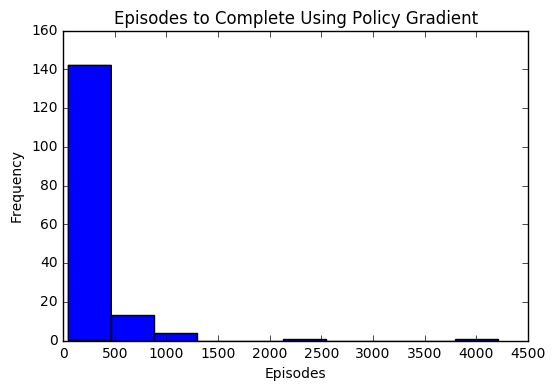

In [16]:
plt.hist(np.array(step_list))
plt.title("Episodes to Complete Using Policy Gradient")
plt.xlabel("Episodes")
plt.ylabel("Frequency")
plt.show()


In [17]:
np.mean(step_list)

268.63354037267078

Random mean :12.61
Hill climb mean: 25.42
Policy mean: 268.61
GA : 1.78

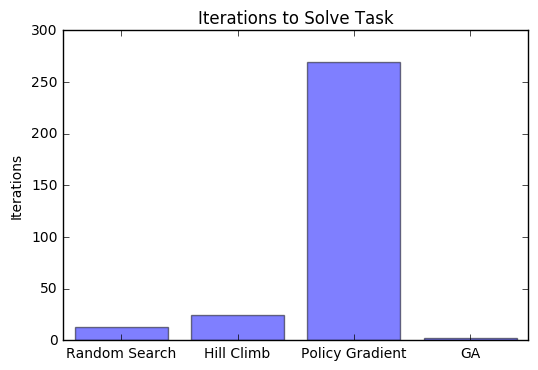

In [22]:




objects = ('Random Search','Hill Climb', 'Policy Gradient', 'GA')
y_pos = np.arange(len(objects))
performance = [13,25,269,2]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Iterations')
plt.title('Iterations to Solve Task')

In [97]:

import gym
import numpy as np
 
def evaluate(env, weight):
    total_reward = 0.0
    num_run = 100
    for t in range(num_run):
        observation = env.reset()
        for i in range(300):
            action = 1 if np.dot(weight, observation) > 0 else 0
             
            observation, reward, done, info = env.step(action)
            total_reward += reward
            if done:
                break
    return total_reward / num_run
 
def evolution_strategy(env):
    # hyperparameters
    npop = 50 # population size
    sigma = 0.1 # noise standard deviation
    alpha = 0.2 # learning rate
 
    # start the optimization
    weight = np.random.rand(4) # our initial guess is random
    for i in range(50):
 
        # print current fitness of the most likely parameter setting
        if i % 1 == 0:
            print 'iter {}. weight: {}, reward: {}'.format(i, str(weight), f(env, weight))
 
        # initialize memory for a population of w's, and their rewards
        N = np.random.randn(npop, 4) # samples from a normal distribution N(0,1)
        R = np.zeros(npop)
        for j in range(npop):
            w_try = weight + sigma * N[j] # jitter w using gaussian of sigma 0.1
            R[j] = evaluate(env, w_try) # evaluate the jittered version
 
        # standardize the rewards to have a gaussian distribution
        A = (R - np.mean(R)) / np.std(R)
        # perform the parameter update. The matrix multiply below
        # is just an efficient way to sum up all the rows of the noise matrix N,
        # where each row N[j] is weighted by A[j]
        weight = weight + alpha / (npop * sigma) * np.dot(N.T, A)
        
        if evaluate(env,weight) > 199:
            return i
            break


step_list = [] 
for x in xrange(200):
    env = gym.make('CartPole-v0')
    step = evolution_strategy(env)
    step_list.append(step)

[2017-05-25 04:55:44,739] Making new env: CartPole-v0


iter 0. weight: [ 0.03573757  0.53721834  0.31260972  0.69263421], reward: 200.0
iter 1. weight: [-0.76398888  0.3593785   0.36711923  0.88104597], reward: 165.65


[2017-05-25 04:56:09,509] Making new env: CartPole-v0


iter 0. weight: [ 0.77275361  0.65982689  0.64509451  0.16967865], reward: 9.57
iter 1. weight: [ 1.09503691  0.57578741  0.64276832  1.00911518], reward: 103.6


[2017-05-25 04:56:17,586] Making new env: CartPole-v0


iter 0. weight: [ 0.36017977  0.15120117  0.18345789  0.55123268], reward: 139.11
iter 1. weight: [-0.94438915 -0.74319487  1.25658503  1.03986807], reward: 128.52


[2017-05-25 04:56:35,024] Making new env: CartPole-v0


iter 0. weight: [ 0.40341199  0.2090285   0.5253071   0.41510558], reward: 175.82
iter 1. weight: [-1.14652646  0.43568121  1.60061506  0.47456985], reward: 150.45


[2017-05-25 04:56:55,530] Making new env: CartPole-v0


iter 0. weight: [ 0.60984009  0.80961861  0.94043154  0.91832528], reward: 199.9


[2017-05-25 04:57:08,034] Making new env: CartPole-v0


iter 0. weight: [ 0.40032314  0.19827041  0.56375148  0.91855373], reward: 187.7


[2017-05-25 04:57:19,816] Making new env: CartPole-v0


iter 0. weight: [ 0.41523751  0.57651477  0.54109103  0.0638182 ], reward: 9.68


[2017-05-25 04:57:20,998] Making new env: CartPole-v0


iter 0. weight: [ 0.13841969  0.82089667  0.13345769  0.42869802], reward: 9.44
iter 1. weight: [-0.15074872 -0.06537614  0.06559751  0.94973232], reward: 148.5
iter 2. weight: [ 1.14667237  1.28902586  0.47873983  1.27356742], reward: 73.03


[2017-05-25 04:57:36,211] Making new env: CartPole-v0


iter 0. weight: [ 0.46440767  0.2453634   0.79779356  0.54227744], reward: 199.05
iter 1. weight: [-0.94890484  0.53382282  1.55501571  0.38462934], reward: 48.7
iter 2. weight: [-1.17013127 -0.33443224  1.4437932   1.89413182], reward: 150.41


[2017-05-25 04:58:03,872] Making new env: CartPole-v0


iter 0. weight: [ 0.74802964  0.62197705  0.91304246  0.30170945], reward: 9.69
iter 1. weight: [ 0.51983211  0.04661441  0.78947289  1.19628535], reward: 187.02


[2017-05-25 04:58:17,278] Making new env: CartPole-v0


iter 0. weight: [ 0.01587677  0.38206377  0.24358356  0.15741419], reward: 9.67
iter 1. weight: [-0.33435065 -0.58573703  0.0572594   1.26959934], reward: 102.44
iter 2. weight: [-0.68798961 -0.06146183  1.39392715  1.56959411], reward: 180.14


[2017-05-25 04:58:37,736] Making new env: CartPole-v0


iter 0. weight: [ 0.43883885  0.74064452  0.33103477  0.33761675], reward: 9.54
iter 1. weight: [ 0.55236001  0.51012136  0.34962393  1.15781918], reward: 153.03
iter 2. weight: [-1.09964241  0.06991102  1.33609346  2.10934847], reward: 162.87


[2017-05-25 04:58:58,701] Making new env: CartPole-v0


iter 0. weight: [ 0.03132908  0.78869864  0.97406977  0.12187386], reward: 9.89
iter 1. weight: [ 0.4434711  -0.43945445  1.60976365  0.15016979], reward: 184.07


[2017-05-25 04:59:10,412] Making new env: CartPole-v0


iter 0. weight: [ 0.2138355   0.60714569  0.89183446  0.88945575], reward: 200.0
iter 1. weight: [ nan  nan  nan  nan], reward: 9.33
iter 2. weight: [ nan  nan  nan  nan], reward: 9.34
iter 3. weight: [ nan  nan  nan  nan], reward: 9.19
iter 4. weight: [ nan  nan  nan  nan], reward: 9.51
iter 5. weight: [ nan  nan  nan  nan], reward: 9.37
iter 6. weight: [ nan  nan  nan  nan], reward: 9.46
iter 7. weight: [ nan  nan  nan  nan], reward: 9.36
iter 8. weight: [ nan  nan  nan  nan], reward: 9.44
iter 9. weight: [ nan  nan  nan  nan], reward: 9.48
iter 10. weight: [ nan  nan  nan  nan], reward: 9.32
iter 11. weight: [ nan  nan  nan  nan], reward: 9.23
iter 12. weight: [ nan  nan  nan  nan], reward: 9.37
iter 13. weight: [ nan  nan  nan  nan], reward: 9.34
iter 14. weight: [ nan  nan  nan  nan], reward: 9.34
iter 15. weight: [ nan  nan  nan  nan], reward: 9.37
iter 16. weight: [ nan  nan  nan  nan], reward: 9.34
iter 17. weight: [ nan  nan  nan  nan], reward: 9.41
iter 18. weight: [ nan  nan

[2017-05-25 04:59:55,974] Making new env: CartPole-v0


iter 0. weight: [ 0.53355596  0.68699788  0.42959165  0.96848914], reward: 154.43
iter 1. weight: [-0.87954525  0.31498668  1.73489825  1.42765565], reward: 189.96


[2017-05-25 05:00:17,218] Making new env: CartPole-v0


iter 0. weight: [ 0.5586458   0.17053029  0.73715406  0.47703489], reward: 166.74
iter 1. weight: [-0.86834209  0.32837703  1.52182708  0.78632247], reward: 176.96
iter 2. weight: [ 0.5622454   1.81498056  1.6573529   1.35269186], reward: 198.53


[2017-05-25 05:00:49,293] Making new env: CartPole-v0


iter 0. weight: [ 0.46419128  0.29176997  0.31822157  0.84287484], reward: 147.18
iter 1. weight: [-1.10592859  0.41527562  1.13408135  1.75971901], reward: 175.06


[2017-05-25 05:01:10,348] Making new env: CartPole-v0


iter 0. weight: [ 0.85549203  0.75092353  0.73266603  0.49420656], reward: 11.78
iter 1. weight: [ 0.51483813 -0.50082902  1.4494587   1.18536107], reward: 184.83


[2017-05-25 05:01:24,646] Making new env: CartPole-v0


iter 0. weight: [ 0.61848803  0.94456398  0.30166902  0.67964124], reward: 25.92
iter 1. weight: [ 0.76274305 -0.3106991   0.92810044  2.41882363], reward: 173.36
iter 2. weight: [-0.65226044 -0.82615102  1.76269293  2.52150016], reward: 160.41
iter 3. weight: [-0.46234059 -0.11352942  2.43833823  2.38247206], reward: 190.66


[2017-05-25 05:02:00,053] Making new env: CartPole-v0


iter 0. weight: [ 0.35685257  0.84299295  0.15462253  0.22471026], reward: 9.48


[2017-05-25 05:02:00,990] Making new env: CartPole-v0


iter 0. weight: [ 0.57885657  0.47513852  0.44977247  0.12830241], reward: 9.62
iter 1. weight: [ 0.25409877  0.13589427  0.43566784  1.05265465], reward: 196.11
iter 2. weight: [-1.33026296  0.68296738  0.93279777  1.32194084], reward: 174.86


[2017-05-25 05:02:27,204] Making new env: CartPole-v0


iter 0. weight: [ 0.24230722  0.45748463  0.66771862  0.70961936], reward: 200.0


[2017-05-25 05:02:40,865] Making new env: CartPole-v0


iter 0. weight: [ 0.1808737   0.80362398  0.23961857  0.87569383], reward: 169.81
iter 1. weight: [-0.90140135  0.29358712  1.45788215  1.46311712], reward: 181.16


[2017-05-25 05:03:04,234] Making new env: CartPole-v0


iter 0. weight: [ 0.23058066  0.32659434  0.49146692  0.11213273], reward: 9.83
iter 1. weight: [-0.69695925 -0.40567605  0.34951554  0.98949955], reward: 130.74


[2017-05-25 05:03:14,671] Making new env: CartPole-v0


iter 0. weight: [ 0.95868276  0.11069734  0.16636672  0.23184397], reward: 41.78
iter 1. weight: [ 0.41077231 -0.58080788 -0.03035324  1.80521477], reward: 102.48
iter 2. weight: [ 0.61209624  0.95521323  0.68954511  1.92951321], reward: 191.83


[2017-05-25 05:03:36,152] Making new env: CartPole-v0


iter 0. weight: [ 0.58023698  0.34856356  0.26253953  0.66069632], reward: 106.94
iter 1. weight: [-0.94504678  0.10561032  1.0195677   1.81460765], reward: 177.32


[2017-05-25 05:03:54,507] Making new env: CartPole-v0


iter 0. weight: [ 0.14450896  0.38212612  0.10703137  0.73972153], reward: 193.76
iter 1. weight: [-0.99735689 -0.24897807  0.69926599  1.5070005 ], reward: 149.91


[2017-05-25 05:04:15,721] Making new env: CartPole-v0


iter 0. weight: [ 0.55116017  0.8579768   0.93638282  0.8659227 ], reward: 200.0


[2017-05-25 05:04:28,354] Making new env: CartPole-v0


iter 0. weight: [ 0.6110183   0.32738713  0.28148272  0.92243102], reward: 132.1
iter 1. weight: [-0.929151   -0.08577184  1.08772971  1.01138115], reward: 142.89


[2017-05-25 05:04:45,897] Making new env: CartPole-v0


iter 0. weight: [ 0.91785831  0.9575675   0.49133138  0.55814039], reward: 9.61
iter 1. weight: [ 1.11861389 -0.23926605  0.55701446  1.67916803], reward: 129.6
iter 2. weight: [-0.76715661 -0.85253158  1.26364923  2.16636333], reward: 158.34
iter 3. weight: [-0.26762304 -0.40963822  2.456559    2.58481929], reward: 173.75


[2017-05-25 05:05:17,798] Making new env: CartPole-v0


iter 0. weight: [ 0.54454469  0.1420397   0.41148464  0.4006189 ], reward: 110.48
iter 1. weight: [-0.77137899  0.14722012  0.90253752  1.53466491], reward: 174.89
iter 2. weight: [ 0.12104772  1.91889401  1.18915222  0.94190219], reward: 9.53


[2017-05-25 05:05:38,020] Making new env: CartPole-v0


iter 0. weight: [ 0.77055279  0.82695913  0.23394414  0.44862211], reward: 9.53
iter 1. weight: [ 0.34135046  0.23503767  0.31011716  1.26441582], reward: 185.77
iter 2. weight: [-1.59489911 -0.05046733  0.49527398  1.9433599 ], reward: 126.1
iter 3. weight: [-1.11991219  0.07089937  1.42566742  2.22501801], reward: 166.13


[2017-05-25 05:06:11,151] Making new env: CartPole-v0


iter 0. weight: [ 0.23238347  0.25491045  0.5042811   0.5245466 ], reward: 200.0
iter 1. weight: [-0.83250161  1.31308609  0.94353708  0.88719302], reward: 25.41
iter 2. weight: [-0.84376281  0.38329775  0.38731873  2.49855335], reward: 170.31
iter 3. weight: [ 0.30499463  2.06138901  0.70872598  2.30240879], reward: 196.94


[2017-05-25 05:06:53,590] Making new env: CartPole-v0


iter 0. weight: [ 0.71606192  0.75899447  0.00188758  0.61499191], reward: 31.44
iter 1. weight: [ 0.83758482 -0.52435212  0.3591572   2.18061709], reward: 154.93
iter 2. weight: [ 1.28210611  1.00056525  1.00180969  2.43373829], reward: 159.33


[2017-05-25 05:07:15,493] Making new env: CartPole-v0


iter 0. weight: [ 0.23179513  0.58250231  0.81517072  0.94316134], reward: 200.0


[2017-05-25 05:07:28,312] Making new env: CartPole-v0


iter 0. weight: [ 0.25796346  0.79765902  0.73695661  0.63195412], reward: 200.0


[2017-05-25 05:07:38,515] Making new env: CartPole-v0


iter 0. weight: [ 0.24887316  0.92506801  0.04054624  0.06468039], reward: 9.34
iter 1. weight: [ 0.4945737   0.793702    0.87677447  0.38105754], reward: 9.84


[2017-05-25 05:07:40,600] Making new env: CartPole-v0


iter 0. weight: [ 0.63515398  0.81059795  0.04296955  0.95839981], reward: 80.71
iter 1. weight: [-0.16292474 -0.01169502  0.89645993  2.19065477], reward: 186.72


[2017-05-25 05:07:57,958] Making new env: CartPole-v0


iter 0. weight: [ 0.3842869   0.19418019  0.2077585   0.85476249], reward: 159.46
iter 1. weight: [-0.80468677  0.04205636  1.45812699  1.3413595 ], reward: 176.54


[2017-05-25 05:08:19,983] Making new env: CartPole-v0


iter 0. weight: [ 0.16983622  0.71912101  0.15257889  0.22299292], reward: 9.51
iter 1. weight: [ 0.12084176  0.57297267  1.83143728 -0.04657593], reward: 9.87


[2017-05-25 05:08:21,620] Making new env: CartPole-v0


iter 0. weight: [ 0.56795793  0.30313456  0.87637879  0.43738234], reward: 199.97


[2017-05-25 05:08:32,669] Making new env: CartPole-v0


iter 0. weight: [ 0.21921611  0.07336363  0.57630021  0.99939369], reward: 199.82


[2017-05-25 05:08:45,065] Making new env: CartPole-v0


iter 0. weight: [ 0.45981908  0.7177073   0.56167373  0.18292326], reward: 9.55
iter 1. weight: [ 0.92775186  0.88237137  0.56753516  1.21000279], reward: 115.13


[2017-05-25 05:08:53,672] Making new env: CartPole-v0


iter 0. weight: [ 0.36326182  0.21949783  0.41174328  0.38913558], reward: 163.75
iter 1. weight: [-0.56825335 -0.0599369   0.79523937  0.69750373], reward: 161.05
iter 2. weight: [ 0.88927919  0.71545676  1.18524391  1.85557593], reward: 189.51


[2017-05-25 05:09:25,788] Making new env: CartPole-v0


iter 0. weight: [ 0.21336161  0.28008625  0.12618201  0.97556587], reward: 186.64
iter 1. weight: [-1.03370717  0.56400681  1.464514    1.10792523], reward: 182.69
iter 2. weight: [ 0.29921001  2.09741862  1.70766901  1.36688879], reward: 16.26


[2017-05-25 05:09:53,183] Making new env: CartPole-v0


iter 0. weight: [ 0.01473942  0.64858384  0.12460917  0.59305142], reward: 165.79
iter 1. weight: [-1.0182796  -0.08542313  0.59242248  1.93083684], reward: 161.01


[2017-05-25 05:10:11,792] Making new env: CartPole-v0


iter 0. weight: [ 0.91870497  0.65598337  0.7803254   0.02861512], reward: 9.73
iter 1. weight: [ 0.45838168  0.54205752  1.35009049 -0.28176482], reward: 9.8


[2017-05-25 05:10:13,458] Making new env: CartPole-v0


iter 0. weight: [ 0.39500392  0.92331322  0.33059658  0.10966416], reward: 9.47
iter 1. weight: [ 0.46607393  0.65772172  1.21041936  0.19551314], reward: 9.77


[2017-05-25 05:10:15,143] Making new env: CartPole-v0


iter 0. weight: [ 0.07163493  0.99793102  0.24860067  0.76245346], reward: 79.26
iter 1. weight: [-0.63867551 -0.36244309  0.8789641   1.69259182], reward: 153.54


[2017-05-25 05:10:31,049] Making new env: CartPole-v0


iter 0. weight: [ 0.89527428  0.35846565  0.55754764  0.73924525], reward: 99.14
iter 1. weight: [-0.30423189 -0.60053299  1.39366422  1.81713552], reward: 170.35
iter 2. weight: [-0.1676767  -0.01736876  1.83895138  1.67382692], reward: 197.36


[2017-05-25 05:11:00,701] Making new env: CartPole-v0


iter 0. weight: [ 0.31043446  0.56681502  0.78200324  0.20100219], reward: 9.79
iter 1. weight: [ 0.47735928  0.09601781  1.25384514  1.4027599 ], reward: 196.33


[2017-05-25 05:11:15,015] Making new env: CartPole-v0


iter 0. weight: [ 0.81237575  0.2977701   0.67639936  0.30271764], reward: 76.12
iter 1. weight: [-0.1287562  -0.11685387  1.32872914  1.03461259], reward: 187.26
iter 2. weight: [ 0.89875153  1.29602351  1.76049368  0.79651769], reward: 10.27
iter 3. weight: [ 0.86144817  0.58103114  1.5930448   1.84210577], reward: 198.59


[2017-05-25 05:11:46,751] Making new env: CartPole-v0


iter 0. weight: [ 0.74225975  0.39441261  0.57703762  0.02375186], reward: 9.82
iter 1. weight: [ 0.28211782 -0.18205755  0.48470884  0.65039717], reward: 181.25


[2017-05-25 05:11:58,512] Making new env: CartPole-v0


iter 0. weight: [ 0.23118782  0.88070476  0.27507734  0.62717075], reward: 31.74
iter 1. weight: [ 0.1019097  -0.38245369  0.93183679  1.69309136], reward: 168.32


[2017-05-25 05:12:13,238] Making new env: CartPole-v0


iter 0. weight: [ 0.45849675  0.62424085  0.08974206  0.33612623], reward: 9.47
iter 1. weight: [ 0.61902893 -0.1299204   0.03460404  1.50434102], reward: 137.83
iter 2. weight: [-0.78251324 -1.02064378  0.93522247  2.39235941], reward: 147.27
iter 3. weight: [-0.68480356 -0.36841162  1.94274024  2.4801055 ], reward: 158.45


[2017-05-25 05:12:43,055] Making new env: CartPole-v0


iter 0. weight: [ 0.94548947  0.11682851  0.19254962  0.24640508], reward: 40.87
iter 1. weight: [ 0.78785054 -1.10667072  0.62395122  1.52364825], reward: 99.07


[2017-05-25 05:12:52,033] Making new env: CartPole-v0


iter 0. weight: [ 0.14069287  0.57245294  0.45737061  0.12311957], reward: 9.71
iter 1. weight: [ 0.17673528 -0.3285038   0.98757264  0.27313355], reward: 178.23
iter 2. weight: [ 0.47621534  1.08617176  1.52455647  0.51156192], reward: 9.72
iter 3. weight: [ 0.91912796  0.4654261   1.51727861  1.48518751], reward: 193.16


[2017-05-25 05:13:17,767] Making new env: CartPole-v0


iter 0. weight: [ 0.22366688  0.62051163  0.46636524  0.79675708], reward: 200.0


[2017-05-25 05:13:30,075] Making new env: CartPole-v0


iter 0. weight: [ 0.04569771  0.48858941  0.12845217  0.2588687 ], reward: 9.46
iter 1. weight: [ 0.0336607  -0.26743563  0.12296588  1.2143608 ], reward: 128.64


[2017-05-25 05:13:40,585] Making new env: CartPole-v0


iter 0. weight: [ 0.60068835  0.25580132  0.20490676  0.24358188], reward: 37.76
iter 1. weight: [ 0.13731926 -0.4072504   1.25838254  1.73511137], reward: 175.54


[2017-05-25 05:13:54,736] Making new env: CartPole-v0


iter 0. weight: [ 0.07908716  0.69885541  0.57892179  0.67481992], reward: 200.0
iter 1. weight: [-0.60088746 -0.36021519  0.30423789  1.64270401], reward: 125.43


[2017-05-25 05:14:14,510] Making new env: CartPole-v0


iter 0. weight: [ 0.58131611  0.69266309  0.04285866  0.20450863], reward: 9.54
iter 1. weight: [ 0.39513353  1.10077507  1.10875116  0.65508437], reward: 9.79


[2017-05-25 05:14:17,326] Making new env: CartPole-v0


iter 0. weight: [ 0.39853805  0.68050561  0.88202917  0.8993405 ], reward: 200.0


[2017-05-25 05:14:30,083] Making new env: CartPole-v0


iter 0. weight: [ 0.7568901   0.60717553  0.16772325  0.79603398], reward: 80.31
iter 1. weight: [-0.06443364 -0.59312947  0.46085742  2.1397611 ], reward: 130.89


[2017-05-25 05:14:43,769] Making new env: CartPole-v0


iter 0. weight: [ 0.83531605  0.0211302   0.21384515  0.70073837], reward: 91.86
iter 1. weight: [-0.01756311 -0.76335462  1.36018911  1.82078766], reward: 153.07


[2017-05-25 05:15:00,135] Making new env: CartPole-v0


iter 0. weight: [ 0.70690815  0.27897101  0.38066946  0.76412885], reward: 116.48
iter 1. weight: [-0.56452215 -0.40564186  1.58283317  1.40739674], reward: 169.25


[2017-05-25 05:15:19,254] Making new env: CartPole-v0


iter 0. weight: [ 0.66562702  0.34495019  0.51827843  0.27605118], reward: 48.68
iter 1. weight: [-0.09526159 -0.65553274  1.16801366  0.91125515], reward: 161.62
iter 2. weight: [ 0.22455484  0.55944245  1.97717576  0.32184025], reward: 18.48
iter 3. weight: [ 0.54510565 -0.25470555  1.5707963   1.48150561], reward: 189.92


[2017-05-25 05:15:49,409] Making new env: CartPole-v0


iter 0. weight: [ 0.91282393  0.07296923  0.06430522  0.44069879], reward: 65.95
iter 1. weight: [ 0.46335978 -0.87760724  0.59382365  2.17627269], reward: 117.71


[2017-05-25 05:16:01,442] Making new env: CartPole-v0


iter 0. weight: [ 0.56988195  0.84989421  0.62676752  0.74825793], reward: 133.41
iter 1. weight: [-0.21412768 -0.33032388  1.48013771  2.01328676], reward: 170.94


[2017-05-25 05:16:20,580] Making new env: CartPole-v0


iter 0. weight: [ 0.9306073   0.8084664   0.58548179  0.7978565 ], reward: 81.16
iter 1. weight: [ 0.61428352 -0.05522837  0.85714643  2.28436984], reward: 181.01


[2017-05-25 05:16:37,657] Making new env: CartPole-v0


iter 0. weight: [ 0.08016314  0.43227952  0.93991692  0.1256348 ], reward: 9.93
iter 1. weight: [ 0.44937665 -0.06050197  0.84075044  0.81729298], reward: 184.5
iter 2. weight: [-0.6342161   1.08015987  1.35687812  0.55226319], reward: 9.8
iter 3. weight: [-0.92497678  0.68849552  1.35466615  1.19932382], reward: 196.93


[2017-05-25 05:17:05,463] Making new env: CartPole-v0


iter 0. weight: [ 0.79173724  0.57746058  0.03580425  0.26222596], reward: 9.42
iter 1. weight: [ 0.79776773  0.27171485  0.14203722  1.04884177], reward: 112.49
iter 2. weight: [-0.65400047  0.07712702  1.76893484  2.05481891], reward: 185.03


[2017-05-25 05:17:25,443] Making new env: CartPole-v0


iter 0. weight: [ 0.357983    0.54719611  0.49595573  0.22038756], reward: 9.79
iter 1. weight: [-0.05308728 -0.14416617  0.92417669  1.72942487], reward: 178.38


[2017-05-25 05:17:40,235] Making new env: CartPole-v0


iter 0. weight: [ 0.81270907  0.45651514  0.17372724  0.96983758], reward: 104.54
iter 1. weight: [-0.85091609 -0.24979778  1.24995073  1.96794755], reward: 166.56
iter 2. weight: [-0.51138878  0.07878141  2.0091754   2.24886257], reward: 190.24


[2017-05-25 05:18:10,104] Making new env: CartPole-v0


iter 0. weight: [ 0.63684935  0.65909709  0.46760854  0.11911768], reward: 9.57


[2017-05-25 05:18:11,024] Making new env: CartPole-v0


iter 0. weight: [ 0.76415727  0.11986998  0.13571758  0.68057009], reward: 90.79
iter 1. weight: [-0.41347992 -0.68162571  0.85883951  1.85816189], reward: 148.28


[2017-05-25 05:18:26,131] Making new env: CartPole-v0


iter 0. weight: [ 0.07413541  0.95439207  0.49999866  0.55336713], reward: 9.57


[2017-05-25 05:18:27,792] Making new env: CartPole-v0


iter 0. weight: [ 0.01278184  0.70587601  0.98543723  0.17285305], reward: 9.73


[2017-05-25 05:18:28,733] Making new env: CartPole-v0


iter 0. weight: [ 0.29986812  0.80163271  0.58838566  0.78993543], reward: 200.0


[2017-05-25 05:18:40,270] Making new env: CartPole-v0


iter 0. weight: [ 0.06003953  0.21495633  0.12726177  0.55322799], reward: 200.0
iter 1. weight: [-1.11342319 -0.03971138  0.79697796  0.64610327], reward: 111.97


[2017-05-25 05:19:00,369] Making new env: CartPole-v0


iter 0. weight: [ 0.46008162  0.46786616  0.73525101  0.74804592], reward: 198.42


[2017-05-25 05:19:13,001] Making new env: CartPole-v0


iter 0. weight: [ 0.66991234  0.36649315  0.5795902   0.96490345], reward: 146.13
iter 1. weight: [-1.06765437  0.83354055  1.18693428  1.19535919], reward: 196.24
iter 2. weight: [ 0.60534268  2.07959172  1.23805722  0.97865213], reward: 9.61
iter 3. weight: [ 0.7627268   1.67253399  1.4994831   1.02667743], reward: 9.69


[2017-05-25 05:19:37,096] Making new env: CartPole-v0


iter 0. weight: [ 0.09736509  0.44241399  0.22067929  0.85476949], reward: 200.0
iter 1. weight: [-1.19084407  0.29594743  0.58401911  1.14433674], reward: 143.18


[2017-05-25 05:19:58,953] Making new env: CartPole-v0


iter 0. weight: [ 0.82928557  0.8986518   0.55332022  0.1006337 ], reward: 9.54


[2017-05-25 05:19:59,884] Making new env: CartPole-v0


iter 0. weight: [ 0.82052884  0.94515076  0.43013531  0.01386859], reward: 9.48
iter 1. weight: [ 0.9961731   0.32526104  1.00682588  0.28808162], reward: 179.12


[2017-05-25 05:20:06,971] Making new env: CartPole-v0


iter 0. weight: [ 0.91138364  0.54506979  0.67762318  0.28669482], reward: 9.58
iter 1. weight: [ 0.78254852 -0.08702465  0.96146784  1.66017478], reward: 174.57


[2017-05-25 05:20:19,346] Making new env: CartPole-v0


iter 0. weight: [ 0.13816231  0.31644618  0.76837264  0.3307402 ], reward: 200.0
iter 1. weight: [ 0.67258906 -0.59470252  0.76471631  1.69139786], reward: 147.07
iter 2. weight: [ 0.85471862  1.34351006  1.13299422  1.79004226], reward: 193.15


[2017-05-25 05:20:53,118] Making new env: CartPole-v0


iter 0. weight: [ 0.60394846  0.62490216  0.64120625  0.37324865], reward: 9.64
iter 1. weight: [ 0.272719   -0.15511896  1.19734449  1.69478872], reward: 197.64


[2017-05-25 05:21:08,629] Making new env: CartPole-v0


iter 0. weight: [ 0.7516528   0.78270694  0.34292751  0.57508242], reward: 24.5
iter 1. weight: [ 0.43150455  0.04083996 -0.11916234  1.99430573], reward: 156.75
iter 2. weight: [-0.84994145  0.24842424  0.72633766  2.50177746], reward: 173.58


[2017-05-25 05:21:31,605] Making new env: CartPole-v0


iter 0. weight: [ 0.07389032  0.4593437   0.43845906  0.652387  ], reward: 200.0
iter 1. weight: [-0.39402538  0.2360588   0.79251828  1.11211784], reward: 198.01


[2017-05-25 05:21:56,851] Making new env: CartPole-v0


iter 0. weight: [ 0.31579422  0.98816581  0.5989938   0.17566217], reward: 9.6
iter 1. weight: [ 0.36773521  0.18249413  1.25468057  0.08503959], reward: 13.76
iter 2. weight: [ 1.15899    -1.2084951   1.09684023  1.15399696], reward: 87.14


[2017-05-25 05:22:08,581] Making new env: CartPole-v0


iter 0. weight: [ 0.23286265  0.50124203  0.23855485  0.68920086], reward: 178.71
iter 1. weight: [-1.05034623  0.48021372  1.14231007  1.71648606], reward: 183.54


[2017-05-25 05:22:30,913] Making new env: CartPole-v0


iter 0. weight: [ 0.94020899  0.57136013  0.73066417  0.18219664], reward: 9.69
iter 1. weight: [ 0.7003326  -0.87526919  0.97250148  0.52764943], reward: 102.68
iter 2. weight: [-0.37394332 -0.22755742  2.47741266  1.06589569], reward: 187.81


[2017-05-25 05:22:50,425] Making new env: CartPole-v0


iter 0. weight: [ 0.78416396  0.44900444  0.77965521  0.35139903], reward: 153.78
iter 1. weight: [ 0.56736723  0.04627257  1.13629675  1.55837232], reward: 194.51


[2017-05-25 05:23:09,570] Making new env: CartPole-v0


iter 0. weight: [ 0.63804137  0.96610072  0.55823074  0.63185244], reward: 10.87
iter 1. weight: [ 0.79955315  0.20679534  0.77225442  1.69034972], reward: 175.51
iter 2. weight: [-0.92939539 -0.00357003  1.46886063  1.45695645], reward: 175.13


[2017-05-25 05:23:34,523] Making new env: CartPole-v0


iter 0. weight: [ 0.99663348  0.07168729  0.8052531   0.33280432], reward: 82.88


[2017-05-25 05:23:40,648] Making new env: CartPole-v0


iter 0. weight: [ 0.49558592  0.0829606   0.43907641  0.26407641], reward: 104.41
iter 1. weight: [-0.56354372 -0.3601954   1.11995073  1.1400726 ], reward: 159.87


[2017-05-25 05:23:57,897] Making new env: CartPole-v0


iter 0. weight: [ 0.96769053  0.2578798   0.1700393   0.29485723], reward: 32.6
iter 1. weight: [ 0.88960298 -0.93625821 -0.00446739  2.08861456], reward: 93.24
iter 2. weight: [ 1.73585038  0.47748987  0.70087644  2.57780275], reward: 126.07


[2017-05-25 05:24:14,813] Making new env: CartPole-v0


iter 0. weight: [ 0.60584795  0.16334593  0.37758644  0.80521789], reward: 137.39
iter 1. weight: [-0.80459823 -0.25729605  1.72183007  1.49066487], reward: 175.65


[2017-05-25 05:24:33,857] Making new env: CartPole-v0


iter 0. weight: [ 0.84651029  0.90420974  0.17228424  0.14460607], reward: 9.43


[2017-05-25 05:24:34,773] Making new env: CartPole-v0


iter 0. weight: [ 0.99562771  0.54087346  0.31343544  0.57361925], reward: 52.22
iter 1. weight: [ 0.82117504 -0.73835518  0.61874117  1.77784092], reward: 127.24
iter 2. weight: [ 1.35748292  1.02426675  1.44838654  1.7477843 ], reward: 163.12


[2017-05-25 05:24:57,253] Making new env: CartPole-v0


iter 0. weight: [ 0.84393991  0.02809055  0.51852965  0.00354562], reward: 9.63
iter 1. weight: [ 0.55066577 -0.64937669  1.04501617  1.6065732 ], reward: 141.25


[2017-05-25 05:25:08,865] Making new env: CartPole-v0


iter 0. weight: [ 0.72322623  0.62284103  0.87431099  0.05166303], reward: 9.8
iter 1. weight: [-0.25239826  0.15303276  1.86588274  0.12015639], reward: 55.68
iter 2. weight: [ 0.12317595 -1.13384447  2.1462188   1.30306774], reward: 161.19
iter 3. weight: [-0.32371361 -0.15586678  2.65271048  1.05812759], reward: 194.23


[2017-05-25 05:25:38,809] Making new env: CartPole-v0


iter 0. weight: [ 0.85578087  0.09211291  0.18215691  0.71317868], reward: 90.51
iter 1. weight: [-0.23044875 -0.69400558  1.29405559  2.36430352], reward: 150.38


[2017-05-25 05:25:54,743] Making new env: CartPole-v0


iter 0. weight: [ 0.63508213  0.95350595  0.00192108  0.28531935], reward: 9.48
iter 1. weight: [ 0.44845102  0.24777623  1.03832514  0.13725203], reward: 13.33
iter 2. weight: [ 0.19217209 -0.41363569  0.71936167  1.46274399], reward: 158.25


[2017-05-25 05:26:09,778] Making new env: CartPole-v0


iter 0. weight: [ 0.7260306   0.45908199  0.6104391   0.48641911], reward: 96.42
iter 1. weight: [-0.96671603  0.0828955   1.36722867  1.01561931], reward: 166.22


[2017-05-25 05:26:26,452] Making new env: CartPole-v0


iter 0. weight: [ 0.49683752  0.71228468  0.51762287  0.93928772], reward: 166.88
iter 1. weight: [-0.7946711   0.01364439  0.83817977  2.00043588], reward: 159.19


[2017-05-25 05:26:47,247] Making new env: CartPole-v0


iter 0. weight: [ 0.41948428  0.54698681  0.78776341  0.43205623], reward: 200.0
iter 1. weight: [ 0.54064812 -0.39691826  0.75735505  1.76917129], reward: 179.64
iter 2. weight: [ 0.78486161  0.79420939  1.29121284  1.76251049], reward: 197.49


[2017-05-25 05:27:19,012] Making new env: CartPole-v0


iter 0. weight: [ 0.17196979  0.38563648  0.1085983   0.49005764], reward: 141.74
iter 1. weight: [-0.00990752 -0.80080214  0.71057325  2.18489033], reward: 131.99
iter 2. weight: [-0.30324209  0.08843706  1.75256998  1.62242995], reward: 199.55


[2017-05-25 05:27:48,217] Making new env: CartPole-v0


iter 0. weight: [ 0.97067673  0.40257218  0.21143194  0.44273793], reward: 44.12
iter 1. weight: [ 0.56832965 -0.53430976  0.63407522  1.9685599 ], reward: 156.04


[2017-05-25 05:28:01,508] Making new env: CartPole-v0


iter 0. weight: [ 0.50954947  0.94701729  0.98022874  0.41395168], reward: 9.77
iter 1. weight: [ 0.8459417   0.42464681  1.04481539  1.28047535], reward: 173.17


[2017-05-25 05:28:14,049] Making new env: CartPole-v0


iter 0. weight: [ 0.70049224  0.18355351  0.26033557  0.43946144], reward: 78.4
iter 1. weight: [-0.08880955 -0.69720591  0.80755632  1.81033756], reward: 141.62


[2017-05-25 05:28:28,390] Making new env: CartPole-v0


iter 0. weight: [ 0.57862162  0.67748268  0.95079669  0.34790762], reward: 9.78
iter 1. weight: [ 0.83167543 -0.34877676  0.94072597  1.61987906], reward: 169.77
iter 2. weight: [-0.38825142 -0.71936373  1.31449835  1.73700347], reward: 164.14


[2017-05-25 05:28:51,889] Making new env: CartPole-v0


iter 0. weight: [ 0.50267112  0.79326067  0.87766791  0.28738435], reward: 9.77


[2017-05-25 05:28:53,048] Making new env: CartPole-v0


iter 0. weight: [ 0.14760546  0.91225359  0.83563945  0.81114167], reward: 200.0


[2017-05-25 05:29:05,712] Making new env: CartPole-v0


iter 0. weight: [ 0.71888873  0.23101623  0.29048266  0.65746188], reward: 100.43
iter 1. weight: [-0.48064674  0.18304843  1.33432232  1.63636727], reward: 192.3


[2017-05-25 05:29:24,927] Making new env: CartPole-v0


iter 0. weight: [ 0.89206299  0.50264369  0.79048669  0.14052453], reward: 9.75
iter 1. weight: [ 1.04205784 -0.528299    0.7410031   0.31722807], reward: 81.24


[2017-05-25 05:29:31,233] Making new env: CartPole-v0


iter 0. weight: [ 0.11181632  0.76184442  0.95147291  0.1750667 ], reward: 9.88


[2017-05-25 05:29:32,167] Making new env: CartPole-v0


iter 0. weight: [ 0.25348505  0.38095844  0.02970955  0.00293088], reward: 9.38
iter 1. weight: [ 0.04753472  0.35431623  1.60293723  0.26919597], reward: 113.19
iter 2. weight: [ 0.37313768 -0.80350446  1.68816017  1.61706266], reward: 167.1


[2017-05-25 05:29:51,178] Making new env: CartPole-v0


iter 0. weight: [ 0.29012968  0.6729259   0.10717693  0.84071404], reward: 127.26
iter 1. weight: [-0.97176452 -0.04643757  1.64063346  1.53127325], reward: 169.76


[2017-05-25 05:30:10,801] Making new env: CartPole-v0


iter 0. weight: [ 0.83769648  0.48564784  0.93853569  0.72965809], reward: 154.01
iter 1. weight: [-0.79878702  0.52429224  2.2459493   0.76953553], reward: 198.11
iter 2. weight: [-0.68380394  0.22998991  2.69575905  1.21481524], reward: 195.44


[2017-05-25 05:30:47,430] Making new env: CartPole-v0


iter 0. weight: [ 0.73091368  0.71212406  0.45723473  0.39445822], reward: 9.57
iter 1. weight: [ 0.5142658  -0.05651272  0.24567253  1.57165153], reward: 157.01
iter 2. weight: [-0.95442383  0.24928659  1.4633707   2.00305611], reward: 179.48


[2017-05-25 05:31:10,381] Making new env: CartPole-v0


iter 0. weight: [ 0.28721411  0.85635814  0.64526627  0.67258776], reward: 200.0
iter 1. weight: [ 0.24832245 -0.3784134   0.27442507  2.14839094], reward: 149.15
iter 2. weight: [ 1.05209335  1.74711762  0.86699598  2.06603963], reward: 145.31


[2017-05-25 05:31:38,577] Making new env: CartPole-v0


iter 0. weight: [ 0.12663761  0.08492645  0.95786829  0.92320659], reward: 200.0
iter 1. weight: [ 0.64308985  1.05703675  1.16318606  0.73748472], reward: 89.03
iter 2. weight: [ 1.02281475  0.59903948  0.93659723  2.58073059], reward: 173.55


[2017-05-25 05:32:07,777] Making new env: CartPole-v0


iter 0. weight: [ 0.4493382   0.41743689  0.39993514  0.25008549], reward: 9.71
iter 1. weight: [ 0.24843492 -0.56916402  0.86769883  1.28462325], reward: 151.95


[2017-05-25 05:32:20,218] Making new env: CartPole-v0


iter 0. weight: [ 0.13270841  0.74686013  0.55448436  0.021606  ], reward: 9.75
iter 1. weight: [ 0.5253453  -0.32143975  1.27535821 -0.17878816], reward: 98.69
iter 2. weight: [ 0.14428353 -0.73826189  1.78219254  1.38343801], reward: 174.99


[2017-05-25 05:32:36,599] Making new env: CartPole-v0


iter 0. weight: [ 0.74047757  0.53085945  0.60368366  0.17056335], reward: 9.71
iter 1. weight: [ 0.30532405 -0.07828079  0.66248043  0.75120933], reward: 183.79


[2017-05-25 05:32:49,740] Making new env: CartPole-v0


iter 0. weight: [ 0.06292138  0.4958144   0.08715509  0.9028915 ], reward: 199.9
iter 1. weight: [-1.04634216  0.4115417   1.03059932  1.56924551], reward: 175.12


[2017-05-25 05:33:15,086] Making new env: CartPole-v0


iter 0. weight: [ 0.98378352  0.97401161  0.70456122  0.6181819 ], reward: 9.75
iter 1. weight: [ 0.87322327 -0.17066418  0.9175578   1.4370884 ], reward: 146.21
iter 2. weight: [-0.88815603  0.1086359   1.67778535  1.38703834], reward: 174.82


[2017-05-25 05:33:38,417] Making new env: CartPole-v0


iter 0. weight: [ 0.10377242  0.28853859  0.14138419  0.03511952], reward: 9.66
iter 1. weight: [ 0.23256785 -0.53675185 -0.17164888  0.69683651], reward: 68.8


[2017-05-25 05:33:44,353] Making new env: CartPole-v0


iter 0. weight: [ 0.70360064  0.71023291  0.23860677  0.22829294], reward: 9.37
iter 1. weight: [ 0.96255388  0.79702611  1.24899896 -0.07333988], reward: 9.76
iter 2. weight: [ 0.1935414  -0.0546173   1.75533117 -0.40052739], reward: 9.87
iter 3. weight: [-0.60879297 -0.16199872  2.33198921  0.42478013], reward: 146.17


[2017-05-25 05:33:56,853] Making new env: CartPole-v0


iter 0. weight: [ 0.24088451  0.95864732  0.2144791   0.33975738], reward: 9.49
iter 1. weight: [-0.07866094  0.6091897   1.1084419   0.24128122], reward: 9.99


[2017-05-25 05:33:58,978] Making new env: CartPole-v0


iter 0. weight: [ 0.80414041  0.39077543  0.41421324  0.10581352], reward: 9.51
iter 1. weight: [ 0.78667485 -0.21525902  0.29017003  0.91803565], reward: 117.1
iter 2. weight: [-0.77893485 -0.92815617  0.95930379  2.15760122], reward: 155.38
iter 3. weight: [-0.81771278 -0.92816077  1.90206822  2.74983953], reward: 168.75
iter 4. weight: [-0.55275825 -0.4159862   1.79007904  2.94164072], reward: 164.46


[2017-05-25 05:34:37,194] Making new env: CartPole-v0


iter 0. weight: [ 0.93682771  0.40080073  0.19880998  0.7745833 ], reward: 79.73
iter 1. weight: [-0.05550196 -0.63841439  1.45012908  2.01423956], reward: 154.43


[2017-05-25 05:34:52,960] Making new env: CartPole-v0


iter 0. weight: [ 0.67692491  0.79754204  0.32793061  0.40433024], reward: 9.42
iter 1. weight: [ 0.3953875   0.03753093  0.51475739  1.09428929], reward: 188.68
iter 2. weight: [-1.30274009  0.07203936  1.5532675   0.9774175 ], reward: 136.3


[2017-05-25 05:35:14,489] Making new env: CartPole-v0


iter 0. weight: [ 0.73455631  0.48806884  0.78334478  0.65256431], reward: 152.12
iter 1. weight: [-0.72556345  0.10752276  2.02398407  1.3446086 ], reward: 186.31
iter 2. weight: [ 0.72508548  1.70495201  2.03272972  1.22730862], reward: 170.13


[2017-05-25 05:35:43,468] Making new env: CartPole-v0


iter 0. weight: [ 0.60385531  0.64266373  0.59437912  0.83978452], reward: 151.98
iter 1. weight: [-0.7568103   0.29300754  1.72429687  1.82565512], reward: 192.47


[2017-05-25 05:36:05,211] Making new env: CartPole-v0


iter 0. weight: [ 0.86577187  0.75929802  0.66161971  0.1231922 ], reward: 9.72
iter 1. weight: [ 1.07223524  0.78848782  1.80534825  0.25931517], reward: 9.83
iter 2. weight: [ 0.36049189  0.45493213  2.69985531  0.11936729], reward: 10.02


[2017-05-25 05:36:07,690] Making new env: CartPole-v0


iter 0. weight: [ 0.28269901  0.96730205  0.66266215  0.11840247], reward: 9.59
iter 1. weight: [ 0.49839546 -0.19068158  1.42926488  0.4809918 ], reward: 196.05
iter 2. weight: [-0.87973621  0.98561138  1.57598772  0.08607954], reward: 9.77
iter 3. weight: [-0.5873512   0.58414339  2.09602381 -0.10360066], reward: 9.96
iter 4. weight: [-0.52870952  0.22575023  2.31187049  0.30062659], reward: 197.69
iter 5. weight: [-0.10630395 -0.32857961  2.16160659  1.2600827 ], reward: 180.7


[2017-05-25 05:36:44,357] Making new env: CartPole-v0


iter 0. weight: [ 0.36605674  0.56857628  0.54878036  0.97633221], reward: 197.49


[2017-05-25 05:36:56,517] Making new env: CartPole-v0


iter 0. weight: [ 0.41906861  0.42245298  0.54441665  0.30479848], reward: 135.85
iter 1. weight: [-0.23631008 -0.54787616  0.90762239  1.33363344], reward: 148.31


[2017-05-25 05:37:11,786] Making new env: CartPole-v0


iter 0. weight: [ 0.42012422  0.57756006  0.21168809  0.85676963], reward: 138.62
iter 1. weight: [-0.74083891  0.15261871  1.31972097  1.78984439], reward: 182.51


[2017-05-25 05:37:31,889] Making new env: CartPole-v0


iter 0. weight: [ 0.27861574  0.97283588  0.05001627  0.16414325], reward: 9.49


[2017-05-25 05:37:32,786] Making new env: CartPole-v0


iter 0. weight: [ 0.04473268  0.34257318  0.67575105  0.3245496 ], reward: 200.0
iter 1. weight: [-0.16104636 -0.82485514  0.79688469  1.61318596], reward: 138.45
iter 2. weight: [-0.25778146 -0.21224976  1.50938014  1.33927682], reward: 178.75


[2017-05-25 05:38:01,907] Making new env: CartPole-v0


iter 0. weight: [ 0.62253008  0.99391515  0.88163282  0.15691765], reward: 9.57


[2017-05-25 05:38:02,853] Making new env: CartPole-v0


iter 0. weight: [ 0.23606649  0.5813626   0.30889203  0.75870745], reward: 190.39
iter 1. weight: [-0.44572584 -0.18446197  1.05631456  1.44886848], reward: 166.0


[2017-05-25 05:38:24,953] Making new env: CartPole-v0


iter 0. weight: [ 0.65215051  0.3497257   0.99524088  0.8452015 ], reward: 188.7
iter 1. weight: [-0.98329827  1.0251873   2.15399765  0.71747731], reward: 39.25
iter 2. weight: [-1.10426248  0.22406055  1.72012265  2.31566616], reward: 179.74


[2017-05-25 05:38:53,032] Making new env: CartPole-v0


iter 0. weight: [ 0.66747977  0.62787057  0.33341854  0.12077435], reward: 9.53
iter 1. weight: [ 0.50740104  0.15702291 -0.11940089  1.16688195], reward: 124.3
iter 2. weight: [-1.14151014  0.54939268  0.2492169   1.89393469], reward: 162.46


[2017-05-25 05:39:12,710] Making new env: CartPole-v0


iter 0. weight: [ 0.01892769  0.35821879  0.85453138  0.04900305], reward: 9.84
iter 1. weight: [-0.02911883 -0.84227989  0.18200815  0.5255386 ], reward: 90.9


[2017-05-25 05:39:19,550] Making new env: CartPole-v0


iter 0. weight: [ 0.7918316   0.83263382  0.83773604  0.15489136], reward: 9.71


[2017-05-25 05:39:20,505] Making new env: CartPole-v0


iter 0. weight: [ 0.80157582  0.43741599  0.22172853  0.25271484], reward: 9.55
iter 1. weight: [ 0.68627001 -0.08631088  0.61316082  1.78671547], reward: 157.24


[2017-05-25 05:39:32,309] Making new env: CartPole-v0


iter 0. weight: [ 0.24498337  0.16034597  0.96318455  0.44233748], reward: 200.0


[2017-05-25 05:39:44,995] Making new env: CartPole-v0


iter 0. weight: [ 0.6310081   0.47605273  0.39884057  0.21394551], reward: 9.53
iter 1. weight: [ 0.77069334 -0.06217776  0.85926485  1.09183206], reward: 156.98


[2017-05-25 05:39:56,044] Making new env: CartPole-v0


iter 0. weight: [ 0.02470766  0.38685635  0.35342596  0.29069181], reward: 200.0
iter 1. weight: [-0.13889105 -0.29811158  0.31974858  1.79579703], reward: 143.84
iter 2. weight: [ 0.56473281  1.41728516  0.84285335  2.2831357 ], reward: 197.98


[2017-05-25 05:40:24,896] Making new env: CartPole-v0


iter 0. weight: [ 0.30592946  0.87013434  0.96653997  0.25837892], reward: 9.76


[2017-05-25 05:40:25,841] Making new env: CartPole-v0


iter 0. weight: [ 0.54655958  0.84471057  0.05218121  0.08808733], reward: 9.34
iter 1. weight: [ 0.07658148  0.60929927  1.18718163  0.10114184], reward: 9.78


[2017-05-25 05:40:27,491] Making new env: CartPole-v0


iter 0. weight: [ 0.54232811  0.3242942   0.07485386  0.80146404], reward: 114.42
iter 1. weight: [-0.97432308 -0.85143408  0.9296742   1.87546061], reward: 141.32
iter 2. weight: [-0.82602139 -0.41688748  1.36438903  2.306051  ], reward: 152.93
iter 3. weight: [-0.1601482   0.02089876  1.99217845  2.61054912], reward: 198.71


[2017-05-25 05:41:06,347] Making new env: CartPole-v0


iter 0. weight: [ 0.35362978  0.38614443  0.10054098  0.03753984], reward: 9.41


[2017-05-25 05:41:07,266] Making new env: CartPole-v0


iter 0. weight: [ 0.52690252  0.8836509   0.08267301  0.70643131], reward: 37.01
iter 1. weight: [-0.14515392 -0.28395278  0.57419617  2.16200494], reward: 158.85


[2017-05-25 05:41:20,105] Making new env: CartPole-v0


iter 0. weight: [ 0.74874797  0.24596584  0.85209129  0.75161604], reward: 150.49


[2017-05-25 05:41:29,895] Making new env: CartPole-v0


iter 0. weight: [ 0.51332992  0.14961581  0.69269896  0.85666672], reward: 175.05
iter 1. weight: [-1.12303585  0.67177519  1.31847129  1.49852747], reward: 191.03


[2017-05-25 05:41:52,912] Making new env: CartPole-v0


iter 0. weight: [ 0.23257853  0.02915283  0.74405098  0.37307701], reward: 200.0
iter 1. weight: [-0.45667339  1.27026829  0.97910634  0.11069682], reward: 9.6


[2017-05-25 05:42:06,160] Making new env: CartPole-v0


iter 0. weight: [ 0.14903663  0.38299669  0.24880637  0.43120077], reward: 199.72
iter 1. weight: [-0.78618336 -0.40894523  1.4866553   1.38343888], reward: 162.35


[2017-05-25 05:42:26,442] Making new env: CartPole-v0


iter 0. weight: [ 0.46055993  0.80511608  0.3917473   0.20138619], reward: 9.5
iter 1. weight: [ 0.58923444  0.27677666  1.53551607  0.02061992], reward: 9.92
iter 2. weight: [ 0.68742089 -0.07446213  1.3108163   1.11379687], reward: 189.44


[2017-05-25 05:42:40,996] Making new env: CartPole-v0


iter 0. weight: [ 0.52337657  0.93106936  0.66143428  0.57738563], reward: 9.51


[2017-05-25 05:42:44,438] Making new env: CartPole-v0


iter 0. weight: [ 0.30930355  0.70654181  0.49695701  0.65400302], reward: 199.48
iter 1. weight: [-0.08277908 -0.06455884  1.55974628  1.50917192], reward: 197.52


[2017-05-25 05:43:08,266] Making new env: CartPole-v0


iter 0. weight: [ 0.23178712  0.25949514  0.7935057   0.24122754], reward: 200.0
iter 1. weight: [ 0.13312874 -0.91387283  1.27871328  1.07552587], reward: 137.73


[2017-05-25 05:43:28,062] Making new env: CartPole-v0


iter 0. weight: [ 0.29678546  0.09208289  0.46812066  0.54822761], reward: 181.52
iter 1. weight: [-1.60370614  0.4669004   1.06067728  0.73956351], reward: 123.92
iter 2. weight: [-0.23275564  1.74198496  0.86248501  1.29965595], reward: 200.0


[2017-05-25 05:43:57,023] Making new env: CartPole-v0


iter 0. weight: [ 0.96757845  0.78255515  0.14384421  0.51233957], reward: 9.56
iter 1. weight: [ 0.67525625  0.04948871  0.15529354  1.64449069], reward: 138.87
iter 2. weight: [-0.85268642  0.04401771  1.32505371  1.8763637 ], reward: 168.42


[2017-05-25 05:44:18,696] Making new env: CartPole-v0


iter 0. weight: [ 0.54704739  0.13091049  0.55002639  0.58005492], reward: 147.13
iter 1. weight: [-0.99863886  0.10761293  1.0678656   1.41102792], reward: 160.08


[2017-05-25 05:44:38,403] Making new env: CartPole-v0


iter 0. weight: [ 0.02797674  0.50317515  0.75873294  0.19305153], reward: 9.82
iter 1. weight: [ 0.42848073 -0.05931277  0.52897337  0.779619  ], reward: 166.18
iter 2. weight: [-1.22679146  0.28398857  1.41751144  1.382334  ], reward: 162.85


[2017-05-25 05:45:00,842] Making new env: CartPole-v0


iter 0. weight: [ 0.25634546  0.69614729  0.41815639  0.54345799], reward: 149.93
iter 1. weight: [-0.06504901 -0.11599121  0.50033319  1.96320542], reward: 171.31
iter 2. weight: [ 0.83417245  1.1499383   0.99840481  2.01684685], reward: 189.31


[2017-05-25 05:45:31,321] Making new env: CartPole-v0


iter 0. weight: [ 0.54463122  0.6157185   0.6457559   0.22339206], reward: 9.61


[2017-05-25 05:45:32,557] Making new env: CartPole-v0


iter 0. weight: [ 0.96150644  0.47972974  0.77982267  0.90998558], reward: 124.23


[2017-05-25 05:45:40,464] Making new env: CartPole-v0


iter 0. weight: [ 0.00663446  0.87823059  0.0848476   0.83858812], reward: 146.12
iter 1. weight: [-0.63483689  0.01929017  1.08888992  2.33139734], reward: 173.71


[2017-05-25 05:45:59,887] Making new env: CartPole-v0


iter 0. weight: [ 0.36814458  0.46636894  0.39298744  0.14281654], reward: 9.64


[2017-05-25 05:46:01,129] Making new env: CartPole-v0


iter 0. weight: [ 0.02063849  0.64532799  0.9392616   0.82808304], reward: 200.0
iter 1. weight: [ nan  nan  nan  nan], reward: 9.49
iter 2. weight: [ nan  nan  nan  nan], reward: 9.34
iter 3. weight: [ nan  nan  nan  nan], reward: 9.22
iter 4. weight: [ nan  nan  nan  nan], reward: 9.39
iter 5. weight: [ nan  nan  nan  nan], reward: 9.51
iter 6. weight: [ nan  nan  nan  nan], reward: 9.39
iter 7. weight: [ nan  nan  nan  nan], reward: 9.39
iter 8. weight: [ nan  nan  nan  nan], reward: 9.48
iter 9. weight: [ nan  nan  nan  nan], reward: 9.46
iter 10. weight: [ nan  nan  nan  nan], reward: 9.4
iter 11. weight: [ nan  nan  nan  nan], reward: 9.28
iter 12. weight: [ nan  nan  nan  nan], reward: 9.43
iter 13. weight: [ nan  nan  nan  nan], reward: 9.54
iter 14. weight: [ nan  nan  nan  nan], reward: 9.38
iter 15. weight: [ nan  nan  nan  nan], reward: 9.37
iter 16. weight: [ nan  nan  nan  nan], reward: 9.31
iter 17. weight: [ nan  nan  nan  nan], reward: 9.49
iter 18. weight: [ nan  nan 

[2017-05-25 05:46:48,272] Making new env: CartPole-v0


iter 0. weight: [ 0.85248453  0.2486426   0.56929711  0.34863568], reward: 65.99
iter 1. weight: [ 0.17212558 -0.72515225  1.08411152  1.53493924], reward: 147.46


[2017-05-25 05:47:02,738] Making new env: CartPole-v0


iter 0. weight: [ 0.41011266  0.87218076  0.91840731  0.27290501], reward: 9.78
iter 1. weight: [ 0.6742729   0.38603041  1.21840863  1.40560747], reward: 198.72


[2017-05-25 05:47:16,662] Making new env: CartPole-v0


iter 0. weight: [ 0.91661602  0.7890272   0.04941009  0.06495366], reward: 9.54
iter 1. weight: [ 1.04777524  1.20098234  0.79261877  0.00990735], reward: 9.54
iter 2. weight: [ 1.33254399  0.61058527  0.89005739  0.29789162], reward: 9.61
iter 3. weight: [ 1.23752967 -0.25070873  0.81702487  1.38269245], reward: 122.21
iter 4. weight: [-0.21670553 -1.286437    1.64951314  1.7942952 ], reward: 150.91
iter 5. weight: [-0.59073209 -0.79578353  2.06728167  2.27588303], reward: 166.97
iter 6. weight: [-0.065683   -0.40328696  2.11290152  2.35693638], reward: 183.35


[2017-05-25 05:48:00,751] Making new env: CartPole-v0


iter 0. weight: [ 0.57510803  0.39727369  0.22400711  0.98068408], reward: 133.72
iter 1. weight: [-0.52871462 -0.54548953  1.20227604  1.69734602], reward: 152.08


[2017-05-25 05:48:19,138] Making new env: CartPole-v0


iter 0. weight: [ 0.18245401  0.16684899  0.04268755  0.21134813], reward: 84.18
iter 1. weight: [-0.24545348 -1.29150513  0.50100975  1.34670875], reward: 118.99
iter 2. weight: [-0.69465781 -0.57225966  1.99759012  1.51746063], reward: 158.32
iter 3. weight: [-0.58331125  0.19963731  2.71429569  1.20763529], reward: 197.43


[2017-05-25 05:48:54,314] Making new env: CartPole-v0


iter 0. weight: [ 0.24448179  0.37134541  0.82115609  0.68851491], reward: 200.0
iter 1. weight: [-0.47480033  1.04714257  0.79174536  0.68452846], reward: 19.59
iter 2. weight: [-0.47929816 -0.02958003  0.30310052  1.82505557], reward: 154.85
iter 3. weight: [ 0.60857977  1.31263344  0.61492077  1.98072816], reward: 186.03


[2017-05-25 05:49:37,441] Making new env: CartPole-v0


iter 0. weight: [ 0.08238465  0.75564554  0.82035333  0.07995043], reward: 9.89


[2017-05-25 05:49:38,458] Making new env: CartPole-v0


iter 0. weight: [ 0.71275116  0.09649514  0.40491281  0.35174011], reward: 81.23
iter 1. weight: [-0.34982555 -0.84304263  1.19920734  1.67488281], reward: 153.28
iter 2. weight: [-0.33844957 -0.4512066   2.18790571  1.30351634], reward: 178.48


[2017-05-25 05:50:05,375] Making new env: CartPole-v0


iter 0. weight: [ 0.52926502  0.9522548   0.04156785  0.58093852], reward: 9.34
iter 1. weight: [ 0.21979953  0.22823585  0.33342777  1.45295783], reward: 198.24
iter 2. weight: [-1.44455133  0.06817558  0.76860584  1.95295437], reward: 142.97


[2017-05-25 05:50:28,622] Making new env: CartPole-v0


iter 0. weight: [ 0.40122397  0.3616978   0.13193281  0.9135803 ], reward: 140.98
iter 1. weight: [-1.11559143 -0.18969888  0.96729143  1.77390521], reward: 151.8


[2017-05-25 05:50:48,671] Making new env: CartPole-v0


iter 0. weight: [ 0.97483553  0.65834094  0.2054089   0.8634875 ], reward: 76.9
iter 1. weight: [ 0.21730867 -0.28218418  0.85453794  2.21166556], reward: 183.29
iter 2. weight: [ 1.25991396  1.33373083  0.58399961  1.77949975], reward: 109.48


[2017-05-25 05:51:14,211] Making new env: CartPole-v0


iter 0. weight: [ 0.14025682  0.97573505  0.71134723  0.46154213], reward: 9.62


[2017-05-25 05:51:15,370] Making new env: CartPole-v0


iter 0. weight: [ 0.48144556  0.95837742  0.07695979  0.37280851], reward: 9.38
iter 1. weight: [ 1.1394392   1.02453906  0.6331548   0.45143625], reward: 9.59


[2017-05-25 05:51:17,097] Making new env: CartPole-v0


iter 0. weight: [ 0.91254143  0.78151597  0.71572253  0.66492205], reward: 65.98


[2017-05-25 05:51:22,155] Making new env: CartPole-v0


iter 0. weight: [ 0.61088633  0.07852004  0.58386296  0.37600582], reward: 115.37
iter 1. weight: [-0.73917595  0.2122128   1.58496791  0.69554526], reward: 177.35


[2017-05-25 05:51:42,617] Making new env: CartPole-v0


iter 0. weight: [ 0.59513082  0.6919112   0.73748038  0.64752722], reward: 192.09


[2017-05-25 05:51:53,536] Making new env: CartPole-v0


iter 0. weight: [ 0.98580348  0.91352016  0.45308275  0.099115  ], reward: 9.63
iter 1. weight: [ 0.75212797  0.98544585  1.40553984  0.3058667 ], reward: 9.88
iter 2. weight: [ 0.50598703  0.51035166  1.78804684  0.216277  ], reward: 9.91
iter 3. weight: [ 0.83268924 -0.0528447   1.60907698  1.56145202], reward: 192.0


[2017-05-25 05:52:10,635] Making new env: CartPole-v0


iter 0. weight: [ 0.64905962  0.29701988  0.19586186  0.86948905], reward: 118.09
iter 1. weight: [-0.30361605 -0.04121967  1.06716149  1.73424539], reward: 177.79
iter 2. weight: [ 0.32768386  1.40496563  0.65246777  1.32987895], reward: 191.59


[2017-05-25 05:52:42,737] Making new env: CartPole-v0


iter 0. weight: [ 0.70771049  0.83800903  0.42576292  0.67360419], reward: 48.64
iter 1. weight: [ 0.92597615 -0.37353612  0.60499969  2.56032313], reward: 161.05
iter 2. weight: [-0.08533515 -1.57716979  1.05978493  3.03326154], reward: 127.67
iter 3. weight: [-0.0999534  -0.67319099  2.19236062  2.94181225], reward: 165.49


[2017-05-25 05:53:16,655] Making new env: CartPole-v0


iter 0. weight: [ 0.03330371  0.72922221  0.19493721  0.99206461], reward: 200.0
iter 1. weight: [-0.74816337  0.03152615  1.03149158  1.42641363], reward: 179.89


[2017-05-25 05:53:39,956] Making new env: CartPole-v0


iter 0. weight: [ 0.85309101  0.35975381  0.22891314  0.35160247], reward: 33.79
iter 1. weight: [ 0.86011574 -0.98083492  0.6961796   1.68927367], reward: 104.64
iter 2. weight: [ 0.71455367  0.36788411  1.25209851  2.26228097], reward: 191.61


[2017-05-25 05:54:02,004] Making new env: CartPole-v0


iter 0. weight: [ 0.95333685  0.7150048   0.61587254  0.31875611], reward: 9.51
iter 1. weight: [ 1.24003458  0.24116536  0.60814913  1.02175345], reward: 101.53
iter 2. weight: [ 0.10797527 -0.15872187  1.41004323  2.24331876], reward: 196.94
iter 3. weight: [ 0.99844981  1.1537003   1.5409495   2.41690435], reward: 198.39


[2017-05-25 05:54:36,546] Making new env: CartPole-v0


iter 0. weight: [ 0.46754355  0.79114905  0.18757985  0.87232963], reward: 99.08
iter 1. weight: [-0.42562603 -0.28173101  1.148506    1.19256646], reward: 164.77


In [99]:
print(step_list)

[1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 2, 2, 1, None, 1, 2, 1, 1, 3, 0, 2, 0, 1, 1, 2, 1, 1, 0, 1, 3, 2, 3, 3, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 3, 1, 1, 3, 1, 3, 0, 1, 1, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 3, 2, 1, 2, 0, 1, 0, 0, 0, 1, 0, 3, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 1, 2, 1, 0, 2, 1, 3, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 3, 1, 4, 1, 2, 2, 1, 2, 5, 0, 1, 1, 0, 2, 0, 1, 2, 2, 1, 0, 1, 0, 1, 2, 0, 1, 3, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 2, 0, 0, 1, 0, None, 1, 1, 6, 1, 3, 3, 0, 2, 2, 1, 2, 0, 1, 0, 1, 0, 3, 2, 3, 1, 2, 3, 1]


In [100]:
step_list = [1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 2, 2, 1, 50, 1, 2, 1, 1, 3, 0, 2, 0, 1, 1, 2, 1, 1, 0, 1, 3, 2, 3, 3, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 3, 1, 1, 3, 1, 3, 0, 1, 1, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 3, 2, 1, 2, 0, 1, 0, 0, 0, 1, 0, 3, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 1, 2, 1, 0, 2, 1, 3, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 3, 1, 4, 1, 2, 2, 1, 2, 5, 0, 1, 1, 0, 2, 0, 1, 2, 2, 1, 0, 1, 0, 1, 2, 0, 1, 3, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 2, 0, 0, 1, 0, 50, 1, 1, 6, 1, 3, 3, 0, 2, 2, 1, 2, 0, 1, 0, 1, 0, 3, 2, 3, 1, 2, 3, 1]

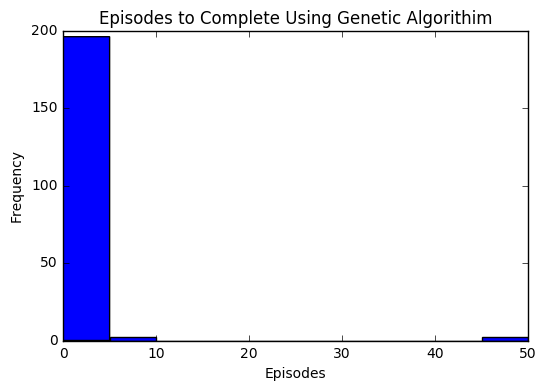

1.78


In [101]:
plt.hist(np.array(step_list))
plt.title("Episodes to Complete Using Genetic Algorithim")
plt.xlabel("Episodes")
plt.ylabel("Frequency")
plt.show()
print np.array(step_list).mean()